In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

%matplotlib inline


df = pd.read_excel("/Users/seojunebeom/Desktop/대학교/2022 1학기/기계학습/R3 fbprophet 성능평가 데이터/금.xlsx",index_col=0)
df




,yhat,종가,MA,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,날짜
ds,,,,,,,,,,,
2000-01,272.401861,281.1,8.698139,2054.6,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04
NaN,273.220747,281.4,8.179253,255.1,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-05
NaN,273.674136,281.9,8.225864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-06
NaN,274.470160,281.7,7.229840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-07
NaN,276.905886,283.4,6.494114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-10
...,...,...,...,...,...,...,...,...,...,...,...
NaN,1860.170850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-16
NaN,1860.326306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-17
NaN,1860.131533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-18


In [3]:
#fbprophet 사용 형식에 맞추기

df_tmp = pd.DataFrame({"ds":df["날짜"], "y":df["종가"], "yhat":df["yhat"]})
df_target = df_tmp[:-1]	# 끝에 NaN 값을 제거함

df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%Y-%m-%d")

# .info()로 확인하면 object이기 때문에 숫자로 바꿔줌
df["y"] = df["y"].astype("float")
df["yhat"] = df["yhat"].astype("float")

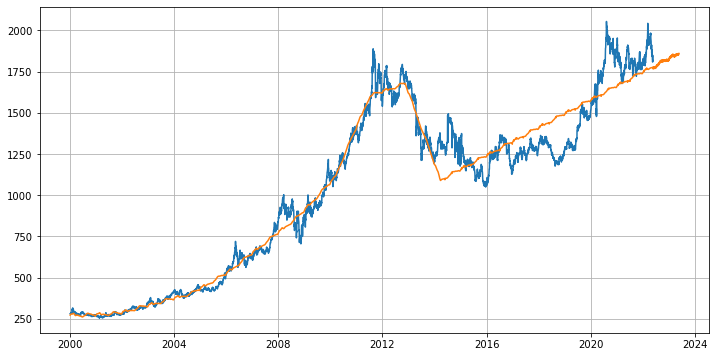

In [4]:
#fbprophet 과 실제 데이터 성능평가 비교

plt.figure(figsize=(12,6))
plt.plot(df["ds"], df["y"], label="real")
plt.plot(df["ds"], df["yhat"], label='real')
plt.grid(True)
plt.show()

In [5]:
#2000년~2021년 데이터 필터링

df_filtered = df.query('"2000-01-04"<= ds <= "2021-12-31"')['y']

#2022년 하반기 데이터 예측값범위생성& 2022년 하반기 평균데이터 출력
df_ha22 = df.query('"2022-07-01"<= ds <= "2022-12-31"')
avg22ha = df_ha22['yhat'].mean()

print(df_ha22)
print(avg22ha)


#2022년 데이터 예측값범위생성& 2022년 평균데이터 출력
df_whole22 = df.query('"2022-01-04"<= ds <= "2022-12-31"')
avg22whole = df_whole22['yhat'].mean()

print(df_whole22)
print(avg22whole)

                ds   y         yhat
ds                                 
2022-07 2022-07-01 NaN  1781.526272
NaN     2022-07-02 NaN  1773.118762
NaN     2022-07-03 NaN  1775.404360
NaN     2022-07-04 NaN  1783.556348
NaN     2022-07-05 NaN  1783.917116
...            ...  ..          ...
NaN     2022-12-27 NaN  1824.898252
NaN     2022-12-28 NaN  1825.673394
NaN     2022-12-29 NaN  1826.161530
NaN     2022-12-30 NaN  1827.074325
NaN     2022-12-31 NaN  1819.075206

[184 rows x 3 columns]
1810.7912183899496
            ds       y         yhat
ds                                 
NaN 2022-01-04  1800.1  1747.983183
NaN 2022-01-05  1814.6  1749.047899
NaN 2022-01-06  1825.1  1749.741563
NaN 2022-01-07  1789.2  1750.772576
NaN 2022-01-10  1797.4  1753.885942
..         ...     ...          ...
NaN 2022-12-27     NaN  1824.898252
NaN 2022-12-28     NaN  1825.673394
NaN 2022-12-29     NaN  1826.161530
NaN 2022-12-30     NaN  1827.074325
NaN 2022-12-31     NaN  1819.075206

[325 rows x 3 column

In [6]:
df_filtered

ds
2000-01     281.1
NaN         281.4
NaN         281.9
NaN         281.7
NaN         283.4
            ...  
NaN        1810.1
NaN        1808.0
NaN        1810.1
NaN        1804.8
NaN        1814.1
Name: y, Length: 5627, dtype: float64

In [7]:
gold_max =df_filtered.max()
gold_min =df_filtered.min()

gold_tick = 255/(gold_max - gold_min)

print(gold_max)
print(gold_min)
gold_tick

2054.6
255.1


0.14170602945262573

In [8]:
rgb22ha = (avg22ha - gold_min)*gold_tick
rgb22whole = (avg22whole - gold_min)*gold_tick

print(rgb22ha)
print(rgb22whole)

220.45082561235742
217.89838520987155
